# Analisis de datos de encuesta - Vetzoone

## Objetivos

### General

Identificar los patrones de demanda, barreras tecnológicas y preferencias funcionales de los usuarios potenciales para validar la viabilidad comercial y técnica mediante análisis cuantitativo de datos de encuesta.

### Especificos

1. Segmentación de Usuarios

Clasificar los perfiles de usuarios según su relación con animales, nivel tecnológico y contexto geográfico para definir segmentos de mercado prioritarios.

2. Priorización Funcional

Jerarquizar las funcionalidades más valoradas por cada segmento de usuario para determinar el alcance del MVP y roadmap de desarrollo.

3. Identificación de Barreras

Cuantificar las limitaciones tecnológicas y operativas reportadas por los usuarios para diseñar estrategias de mitigación y adaptación del producto.

4. Validación del Modelo de Negocio

Determinar la disposición de pago y preferencias de monetización por segmento para validar la sostenibilidad financiera del proyecto.

5. Análisis de Adopción Digital

Evaluar el nivel de madurez tecnológica de los usuarios para establecer estrategias de onboarding y experiencia de usuario diferenciadas.

6. Mapeo de Necesidades No Cubiertas

Identificar gaps en soluciones actuales utilizadas por los usuarios para definir ventajas competitivas diferenciadores.

## 1. Carga y Exploración Inicial de Datos

Comenzamos cargando el dataset de la encuesta y exploramos su estructura básica. Importamos las librerías necesarias para el análisis y cargamos los datos desde el archivo CSV para tener una primera vista de la información disponible.

In [162]:
import pandas as pd
import numpy as np

path = "encuestas/encuesta_mayo.csv"
df = pd.read_csv(path)

df.head()

,Marca temporal,Dirección de correo electrónico,¿Cuál es su relación principal con los animales?,"¿Cómo gestiona actualmente la información y los registros relacionados con la salud y el cuidado de los animales bajo su responsabilidad (ya sea como propietario, productor o profesional veterinario)?","¿Cuáles considera que son sus principales desafíos actuales en la gestión de la salud animal, el cuidado de los animales o en su actividad profesional relacionada con ellos? (Seleccione todos los que apliquen)","Considerando su actividad principal relacionada con animales (cuidado personal, producción o práctica profesional), ¿qué nivel de adopción tecnológica diría que tiene actualmente?","¿Qué tan importante considera la capacidad de acceder y gestionar información relevante sobre la salud y manejo de los animales desde dispositivos móviles (teléfonos, tablets)?","Pensando en una plataforma digital integral para la salud y gestión animal, ¿qué funcionalidades consideraría más valiosas o útiles? (Seleccione todas las que correspondan)","Al evaluar una nueva plataforma digital para la gestión de la salud animal, ¿qué factores consideraría más importantes? (Seleccione todos los que correspondan)","Imaginando una aplicación móvil que facilite la gestión de la salud animal y la conexión entre los diferentes usuarios (dueños de animales y veterinarios), ¿qué tan probable es que usted la utilizara si cumpliera con sus principales necesidades?",...,"Independientemente de si es proveedor o usuario de servicios veterinarios, ¿qué aspectos considera más importantes al momento de elegir, ofrecer o interactuar en el ámbito de la salud animal? (Seleccione todas las que apliquen)","¿Cómo suele descubrir nuevos servicios, productos o tecnologías para el cuidado o manejo de sus animales, o para su actividad profesional en el sector? (Seleccione todas las que apliquen)",¿En qué rango de edad se encuentra?,¿Cuál es su situación laboral actual?,¿En qué tipo de localidad reside usted o se ubica su principal operación/actividad con animales?,"Pensando en el lugar donde habitualmente maneja, cuida a sus animales o ejerce su profesión veterinaria, ¿cómo describiría su acceso a internet?",¿Cuánto tiempo dedica aproximadamente al día al uso de aplicaciones móviles en general (no necesariamente relacionadas con animales)?,Qué dispositivos utiliza principalmente para buscar información o gestionar actividades (en general o relacionadas con sus animales/práctica profesional)? (Seleccione todas las que correspondan),¿Qué tan cómodo se siente realizando pagos o transacciones financieras a través de aplicaciones móviles o plataformas en línea?,"¿Hay alguna otra necesidad, desafío particular o funcionalidad que no hayamos mencionado y que usted considere importante o muy útil para una plataforma digital de servicios veterinarios y gestión de salud animal?"
0,22/5/2025 16:52:29,soyeinmariles@gmail.com,Soy dueño/a principalmente de mascotas domésti...,No llevo un registro sistemático o es muy básico,"Seguimiento de tratamientos, vacunas y recorda...",Intermedio (combinamos métodos digitales y tra...,Poco importante,Sistema de agenda y gestión de citas (para sol...,Facilidad de uso y que la interfaz sea intuiti...,Moderadamente probable,...,Experiencia y especialización del profesional/...,Recomendación de mi veterinario/a de confianza...,18-24 años,Estudiante,"Zona urbana (ciudad, población grande)",Conexión de alta velocidad y estable (ej. Fibr...,Más de 4 horas,Smartphone (teléfono inteligente),"Moderadamente cómodo, lo hago ocasionalmente c...",NaN
1,22/5/2025 16:52:56,jsjonathansantos56@gmail.com,Soy dueño/a principalmente de mascotas domésti...,Principalmente con registros físicos en papel ...,"Seguimiento de tratamientos, vacunas y recorda...",Avanzado (utilizamos algunas herramientas digi...,Muy importante,Expediente clínico/de salud digital por animal...,"Seguridad y privacidad de los datos., Compatib...",Moderadamente probable,...,Disponibilidad y rapidez

### Exploración de las columnas originales

Antes de proceder con la limpieza, revisamos todas las columnas del dataset original para entender qué información tenemos disponible. Esto nos ayuda a planificar mejor el renombrado de variables.

In [163]:
cols = df.columns
for col in cols:
    print(col)

Marca temporal
Dirección de correo electrónico
¿Cuál es su relación principal con los animales?
¿Cómo gestiona actualmente la información y los registros relacionados con la salud y el cuidado de los animales bajo su responsabilidad (ya sea como propietario, productor o profesional veterinario)?
¿Cuáles considera que son sus principales desafíos actuales en la gestión de la salud animal, el cuidado de los animales o en su actividad profesional relacionada con ellos? (Seleccione todos los que apliquen)  
Considerando su actividad principal relacionada con animales (cuidado personal, producción o práctica profesional), ¿qué nivel de adopción tecnológica diría que tiene actualmente? 
¿Qué tan importante considera la capacidad de acceder y gestionar información relevante sobre la salud y manejo de los animales desde dispositivos móviles (teléfonos, tablets)? 
Pensando en una plataforma digital integral para la salud y gestión animal, ¿qué funcionalidades consideraría más valiosas o útiles?

### Renombrado de columnas para facilitar el análisis

Para trabajar más eficientemente, renombramos todas las columnas con nombres más cortos y descriptivos. Esto nos permitirá referenciar las variables de manera más sencilla durante todo el análisis.

In [164]:
column_mapping = {
    'Marca temporal': 'timestamp',
    'Dirección de correo electrónico': 'email',
    '¿Cuál es su relación principal con los animales?': 'relacion_animales',
    '¿Cómo gestiona actualmente la información y los registros relacionados con la salud y el cuidado de los animales bajo su responsabilidad (ya sea como propietario, productor o profesional veterinario)?': 'gestion_actual_registros',
    '¿Cuáles considera que son sus principales desafíos actuales en la gestión de la salud animal, el cuidado de los animales o en su actividad profesional relacionada con ellos? (Seleccione todos los que apliquen)': 'desafios_actuales',
    'Considerando su actividad principal relacionada con animales (cuidado personal, producción o práctica profesional), ¿qué nivel de adopción tecnológica diría que tiene actualmente?': 'nivel_adopcion_tecnologica',
    '¿Qué tan importante considera la capacidad de acceder y gestionar información relevante sobre la salud y manejo de los animales desde dispositivos móviles (teléfonos, tablets)?': 'importancia_dispositivos_moviles',
    'Pensando en una plataforma digital integral para la salud y gestión animal, ¿qué funcionalidades consideraría más valiosas o útiles?  (Seleccione todas las que correspondan)': 'funcionalidades_valiosas',
    'Al evaluar una nueva plataforma digital para la gestión de la salud animal, ¿qué factores consideraría más importantes? (Seleccione todos los que correspondan)': 'factores_importantes_evaluacion',
    'Imaginando una aplicación móvil que facilite la gestión de la salud animal y la conexión entre los diferentes usuarios (dueños de animales y veterinarios), ¿qué tan probable es que usted la utilizara si cumpliera con sus principales necesidades?': 'probabilidad_uso_app',
    '¿Cuánto estaría dispuesto/a a pagar mensualmente por una suscripción a una plataforma digital integral con estas características, o qué modelo de pago preferiría?': 'disposicion_pago',
    '¿Utiliza actualmente alguna plataforma digital, software, aplicación específica o incluso grupos en redes sociales para la gestión de la salud de sus animales, o para acceder u ofrecer servicios veterinarios?': 'uso_actual_herramientas_digitales',
    'Si utiliza alguna herramienta o sistema digital para la gestión animal, ¿qué es lo que más valora o le resulta más útil de ella? (Si no utiliza ninguna, puede seleccionar "No aplica")': 'valor_herramientas_actuales',
    '¿Qué le ha frustrado más o qué carencias importantes ha encontrado en aplicaciones, software o servicios digitales para la gestión animal que haya utilizado o evaluado en el pasado? (Seleccione todas las que apliquen. Si no ha utilizado ninguna, puede seleccionar la última opción)': 'frustraciones_carencias',
    'Independientemente de si es proveedor o usuario de servicios veterinarios, ¿qué aspectos considera más importantes al momento de elegir, ofrecer o interactuar en el ámbito de la salud animal? (Seleccione todas las que apliquen)': 'aspectos_importantes_servicios',
    '¿Cómo suele descubrir nuevos servicios, productos o tecnologías para el cuidado o manejo de sus animales, o para su actividad profesional en el sector? (Seleccione todas las que apliquen)': 'descubrimiento_servicios',
    '¿En qué rango de edad se encuentra?': 'rango_edad',
    '¿Cuál es su situación laboral actual?': 'situacion_laboral',
    '¿En qué tipo de localidad reside usted o se ubica su principal operación/actividad con animales?': 'tipo_localidad',
    'Pensando en el lugar donde habitualmente maneja, cuida a sus animales o ejerce su profesión veterinaria, ¿cómo describiría su acceso a internet?': 'acceso_internet',
    '¿Cuánto tiempo dedica aproximadamente al día al uso de aplicaciones móviles en general (no necesariamente relacionadas con animales)?': 'tiempo_uso_apps',
    'Qué dispositivos utiliza principalmente para buscar información o gestionar actividades (en general o relacionadas con sus animales/práctica profesional)? (Seleccione todas las que correspondan)': 'dispositivos_principales',
    '¿Qué tan cómodo se siente realizando pagos o transacciones financieras a través de aplicaciones móviles o plataformas en línea?': 'comodidad_pagos_online',
    '¿Hay alguna otra necesidad, desafío particular o funcionalidad que no hayamos mencionado y que usted considere importante o muy útil para una plataforma digital de servicios veterinarios y gestión de salud animal?': 'otras_necesidades'
}

df.columns = df.columns.str.strip()
df = df.rename(columns=column_mapping)

print("---- Nuevas columnas: ----")
for col in df.columns:
    print(col)
print("--------------------------")

---- Nuevas columnas: ----
timestamp
email
relacion_animales
gestion_actual_registros
desafios_actuales
nivel_adopcion_tecnologica
importancia_dispositivos_moviles
funcionalidades_valiosas
factores_importantes_evaluacion
probabilidad_uso_app
disposicion_pago
uso_actual_herramientas_digitales
valor_herramientas_actuales
frustraciones_carencias
aspectos_importantes_servicios
descubrimiento_servicios
rango_edad
situacion_laboral
tipo_localidad
acceso_internet
tiempo_uso_apps
dispositivos_principales
comodidad_pagos_online
otras_necesidades
--------------------------


## 2. Análisis de Calidad de Datos

Revisamos la completitud de nuestros datos identificando valores faltantes por columna. También convertimos algunas variables categóricas clave a su tipo de dato apropiado y calculamos las frecuencias básicas para entender la distribución de nuestras variables principales.

In [165]:
faltantes = df.isnull().sum().sort_values(ascending=False)
pct_faltantes = (df.isnull().mean() * 100).sort_values(ascending=False)

print("--- Cantidad de valores faltantes por columna: ---")
print(faltantes[faltantes > 0])

print("\n--- Porcentaje de valores faltantes por columna (solo >0%): ---")
print(pct_faltantes[pct_faltantes > 0])

df['relacion_animales'] = df['relacion_animales'].astype('category')
df['gestion_actual_registros'] = df['gestion_actual_registros'].astype('category')
df['nivel_adopcion_tecnologica'] = df['nivel_adopcion_tecnologica'].astype('category')

conteos_relacion_animales = df.groupby('relacion_animales', observed=False).size()
conteos_gestion_actual_registros = df.groupby('gestion_actual_registros', observed=False).size()
conteos_nivel_adopcion_tecnologica = df.groupby('nivel_adopcion_tecnologica', observed=False).size()

print(f"\nConeto: {conteos_relacion_animales} ")
print(f"\nConeto: {conteos_gestion_actual_registros} ")
print(f"\nConeto: {conteos_nivel_adopcion_tecnologica} ")

--- Cantidad de valores faltantes por columna: ---
otras_necesidades    10
dtype: int64

--- Porcentaje de valores faltantes por columna (solo >0%): ---
otras_necesidades    58.823529
dtype: float64

Coneto: relacion_animales
Manejo tanto mascotas domésticas como animales de granja/rancho.                   4
Soy dueño/a principalmente de mascotas domésticas (perros, gatos, aves, etc.).    12
Soy profesional veterinario                                                        1
dtype: int64 

Coneto: gestion_actual_registros
No llevo un registro sistemático o es muy básico                                     5
Principalmente con registros físicos en papel (cartillas, expedientes, bitácoras)    8
Una combinación de métodos digitales y en papel                                      1
Utilizando hojas de cálculo (Excel, Google Sheets, etc.)                             3
dtype: int64 

Coneto: nivel_adopcion_tecnologica
Avanzado (utilizamos algunas herramientas digitales clave)               

## 3. Análisis de Segmentación de Usuarios

### 3.1 Relación principal con animales

Creamos visualizaciones para entender la composición de nuestros encuestados según su relación principal con los animales. Esta segmentación es fundamental para definir nuestros grupos objetivo.

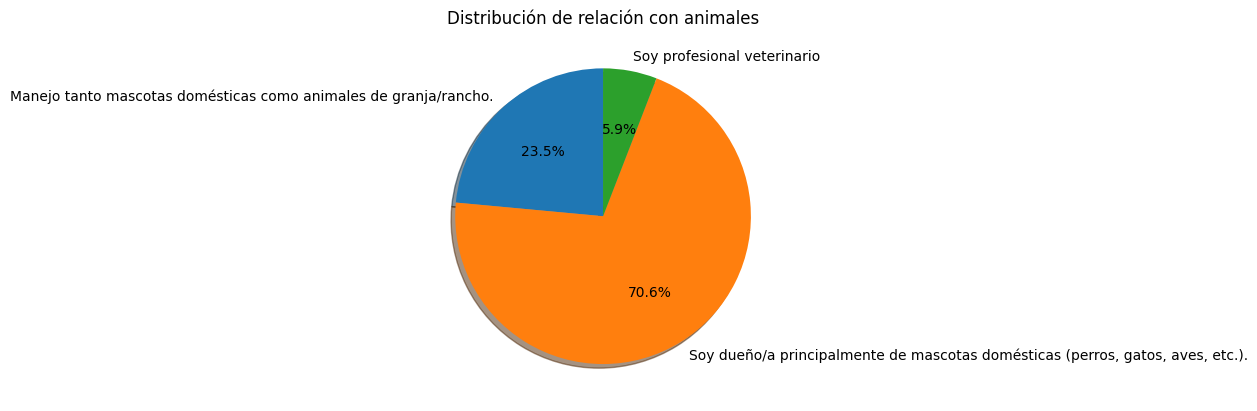

In [166]:
import matplotlib.pyplot as plt

conteos_relacion_animales.plot.pie(
    autopct='%.1f%%',     
    shadow=True,           
    startangle=90,        
    legend=False           
)
plt.ylabel('')             
plt.title('Distribución de relación con animales')
plt.show()

### 3.2 Métodos actuales de gestión de registros

Analizamos cómo gestionan actualmente los encuestados la información de salud animal. Esto nos ayuda a identificar las oportunidades de digitalización y los hábitos actuales que debemos considerar.

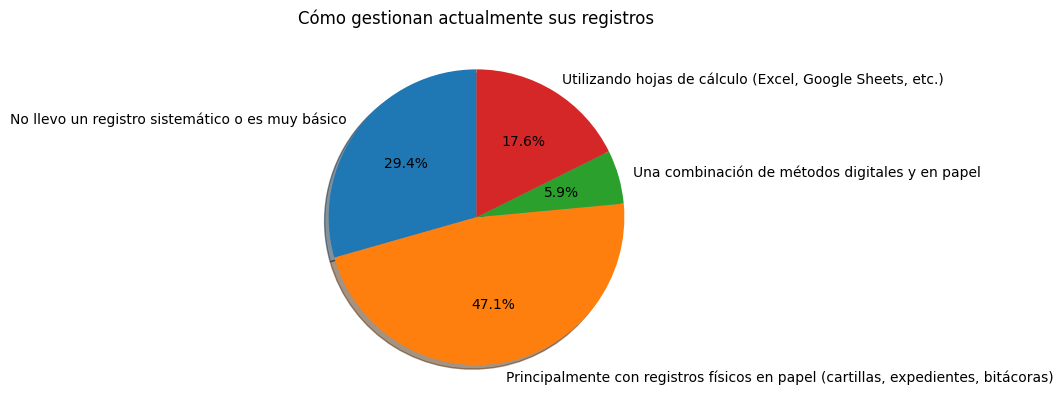

In [167]:
conteos_gestion_actual_registros.plot.pie(
    autopct='%.1f%%',
    shadow=True,
    startangle=90,
    legend=False
)
plt.ylabel('')
plt.title('Cómo gestionan actualmente sus registros')
plt.show()


### 3.3 Nivel de adopción tecnológica actual

Evaluamos el nivel de madurez tecnológica de nuestros encuestados. Esta información es crucial para diseñar estrategias de onboarding diferenciadas y entender las barreras tecnológicas que enfrentamos.

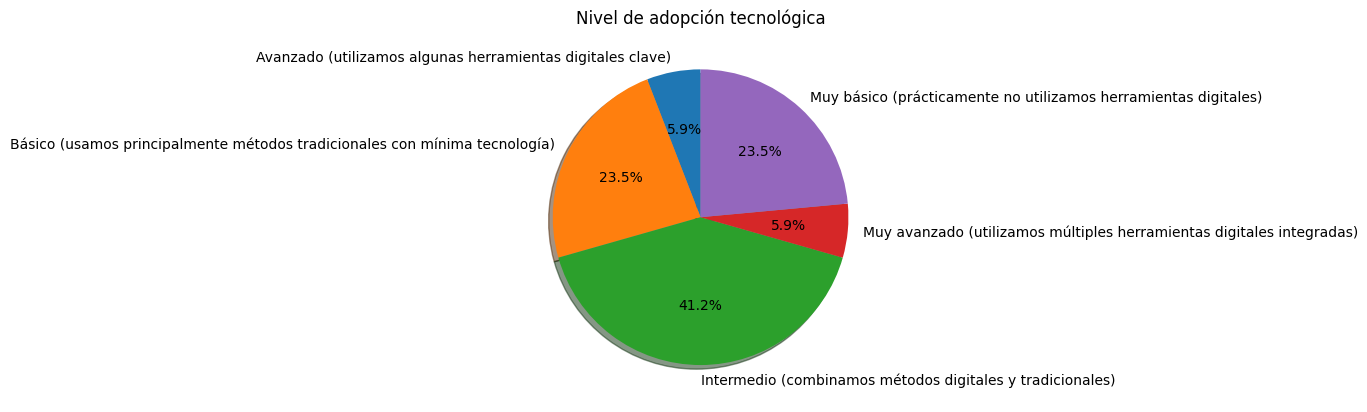

In [168]:
conteos_nivel_adopcion_tecnologica.plot.pie(
    autopct='%.1f%%',
    shadow=True,
    startangle=90,
    legend=False
)
plt.ylabel('')
plt.title('Nivel de adopción tecnológica')
plt.show()

## 4. Análisis Cuantitativo de Variables Clave

### 4.1 Importancia de dispositivos móviles

Analizamos cuantitativamente la importancia que los usuarios asignan a los dispositivos móviles para gestionar información de salud animal. Seguimos el enfoque del notebook e1 para crear mapeos numéricos que nos permitan calcular métricas estadísticas.

In [169]:
def mapear_importancia_dispositivos(opcion):
    if opcion == "Nada importante":
        return 0
    elif opcion == "Poco importante":
        return 1
    elif opcion == "Moderadamente importante":
        return 2
    elif opcion == "Muy importante":
        return 3
    elif opcion == "Extremadamente importante":
        return 4
    else:
        return None

print("Opciones disponibles para importancia de dispositivos móviles:")
for opcion in df['importancia_dispositivos_moviles'].unique():
    print(f"- {opcion}")

df['importancia_dispositivos_moviles_num'] = df['importancia_dispositivos_moviles'].apply(mapear_importancia_dispositivos)

media_importancia = df['importancia_dispositivos_moviles_num'].mean()
nivel_porcentual = (media_importancia / 4) * 100

print(f"\nMedia de importancia (0-4): {media_importancia:.3f}")
print(f"Nivel porcentual de importancia: {nivel_porcentual:.1f}%")

Opciones disponibles para importancia de dispositivos móviles:
- Poco importante
- Muy importante
- Extremadamente importante
- Moderadamente importante
- Nada importante

Media de importancia (0-4): 2.529
Nivel porcentual de importancia: 63.2%


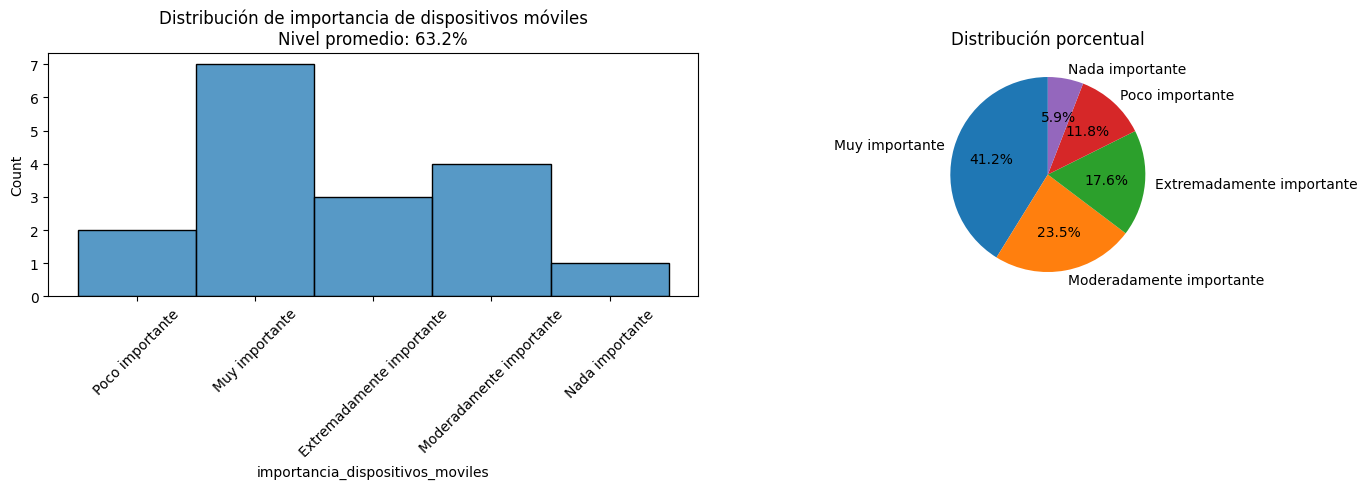


Distribución de respuestas:
Muy importante: 7 (41.2%)
Moderadamente importante: 4 (23.5%)
Extremadamente importante: 3 (17.6%)
Poco importante: 2 (11.8%)
Nada importante: 1 (5.9%)


In [170]:
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data=df, x='importancia_dispositivos_moviles', ax=ax1)
ax1.set_title(f'Distribución de importancia de dispositivos móviles\nNivel promedio: {nivel_porcentual:.1f}%')
ax1.tick_params(axis='x', rotation=45)

conteos_importancia = df['importancia_dispositivos_moviles'].value_counts()
ax2.pie(conteos_importancia.values, labels=conteos_importancia.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Distribución porcentual')

plt.tight_layout()
plt.show()

print("\nDistribución de respuestas:")
for opcion, count in conteos_importancia.items():
    porcentaje = (count / len(df)) * 100
    print(f"{opcion}: {count} ({porcentaje:.1f}%)")

## 5. Segmentación de Usuarios (Objetivo Específico 1)

### 5.1 Matriz de segmentación: Relación con animales vs Adopción tecnológica

Creamos una matriz cruzada para identificar los segmentos de mercado prioritarios basados en la relación con animales y el nivel de adopción tecnológica.

In [171]:
segmentacion = pd.crosstab(df['relacion_animales'], df['nivel_adopcion_tecnologica'], margins=True)
segmentacion_pct = pd.crosstab(df['relacion_animales'], df['nivel_adopcion_tecnologica'], normalize='index') * 100

segmentacion_clean = segmentacion.iloc[:-1, :-1]  # Sin totales
segmentacion_pct_clean = segmentacion_pct.iloc[:, :]

print("=== RESUMEN DE SEGMENTACIÓN ===")
print(f"Total de encuestados: {len(df)}")
print(f"Segmentos identificados: {segmentacion_clean.shape[0]} x {segmentacion_clean.shape[1]} = {segmentacion_clean.shape[0] * segmentacion_clean.shape[1]}")
print("\nDistribución por segmento:")
print(segmentacion_clean)

=== RESUMEN DE SEGMENTACIÓN ===
Total de encuestados: 17
Segmentos identificados: 3 x 5 = 15

Distribución por segmento:
nivel_adopcion_tecnologica                          Avanzado (utilizamos algunas herramientas digitales clave)  \
relacion_animales                                                                                                
Manejo tanto mascotas domésticas como animales ...                                                  0            
Soy dueño/a principalmente de mascotas doméstic...                                                  1            
Soy profesional veterinario                                                                         0            

nivel_adopcion_tecnologica                          Básico (usamos principalmente métodos tradicionales con mínima tecnología)  \
relacion_animales                                                                                                                
Manejo tanto mascotas domésticas como animales .

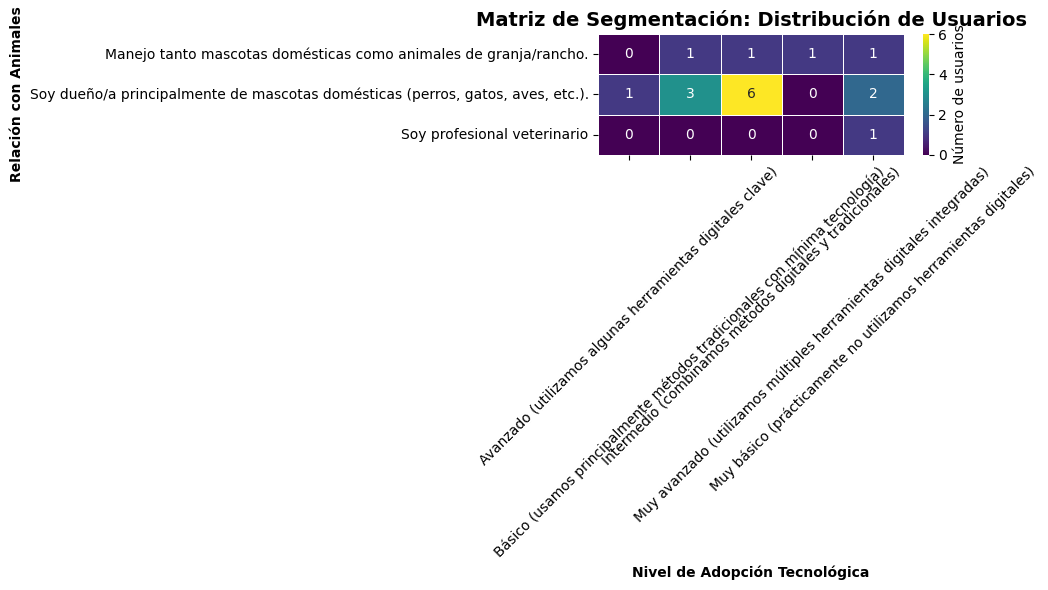

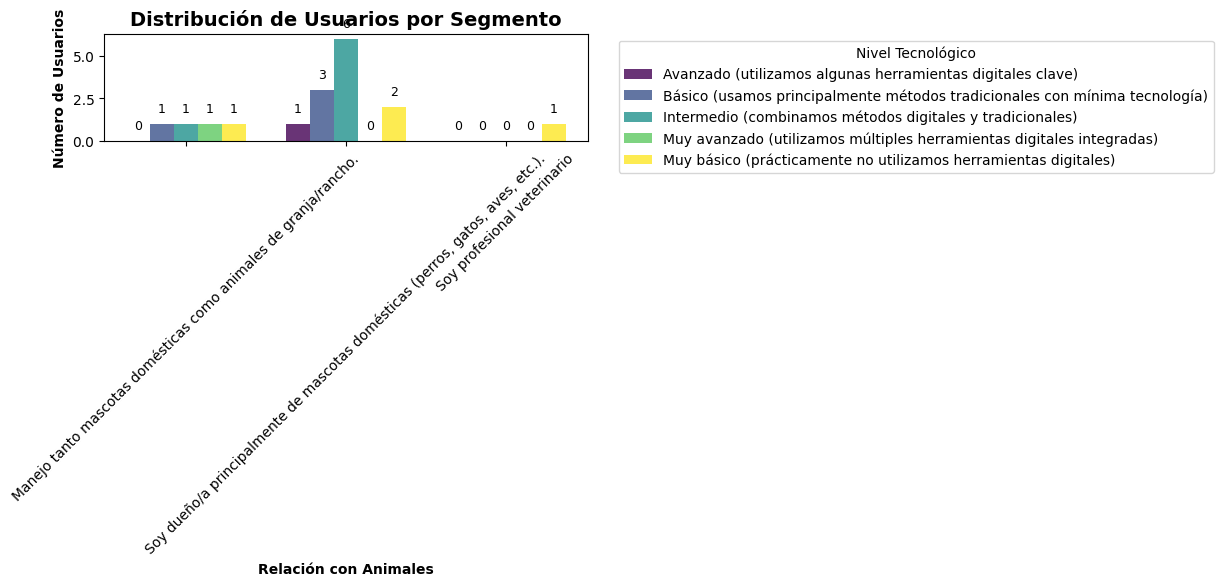

/tmp/ipykernel_98162/22380017.py:78: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



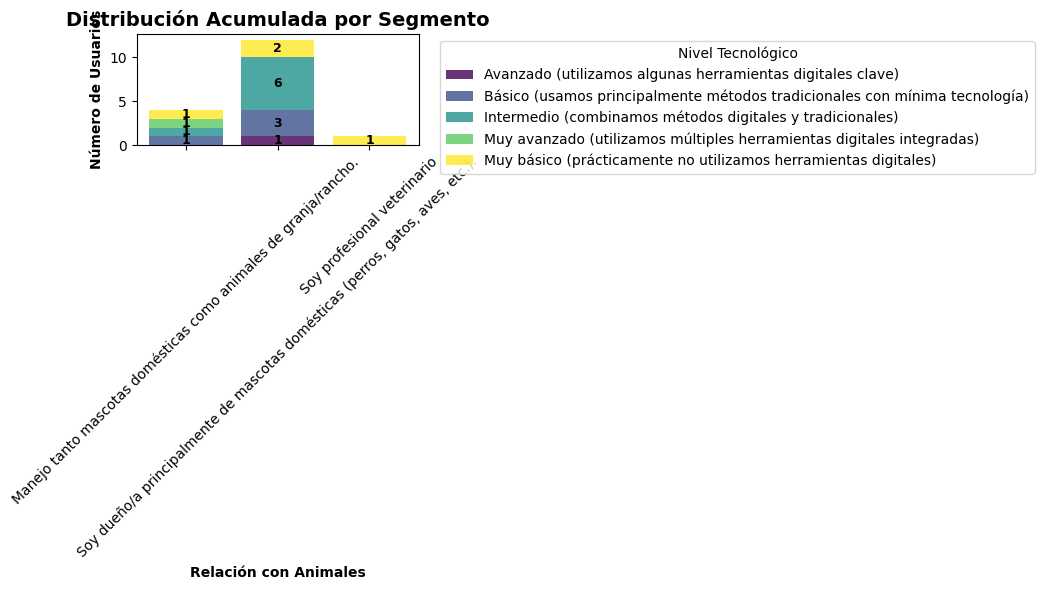

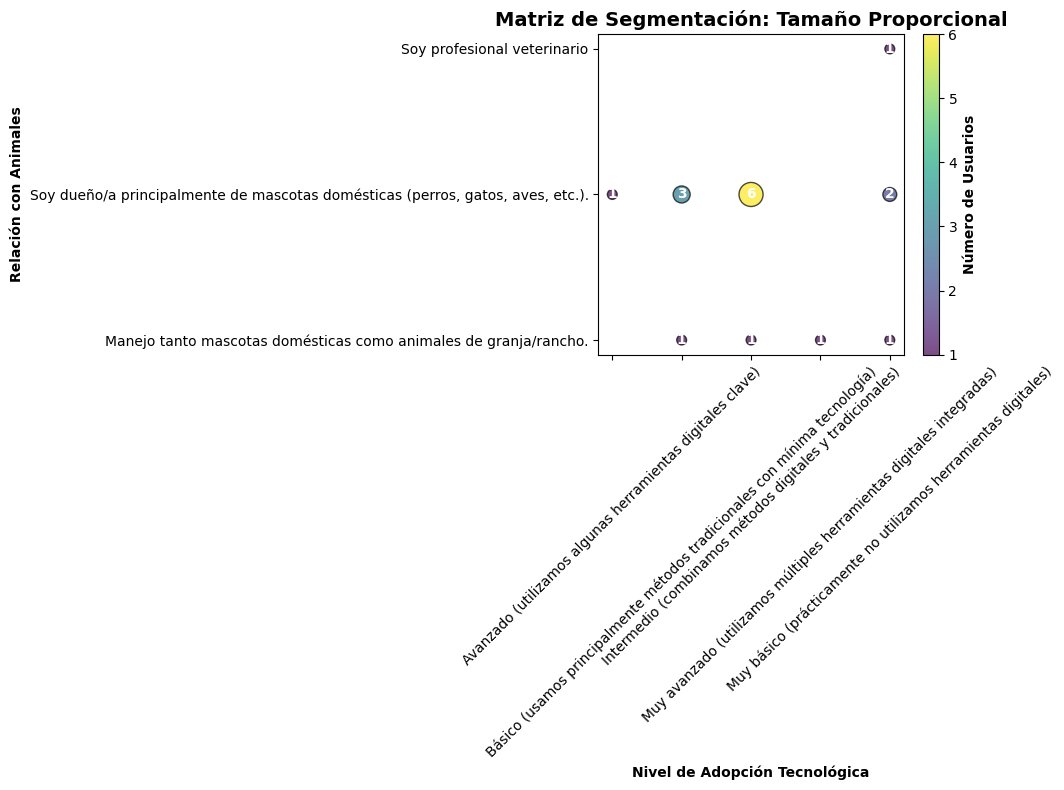

/tmp/ipykernel_98162/22380017.py:160: UserWarning:

Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations



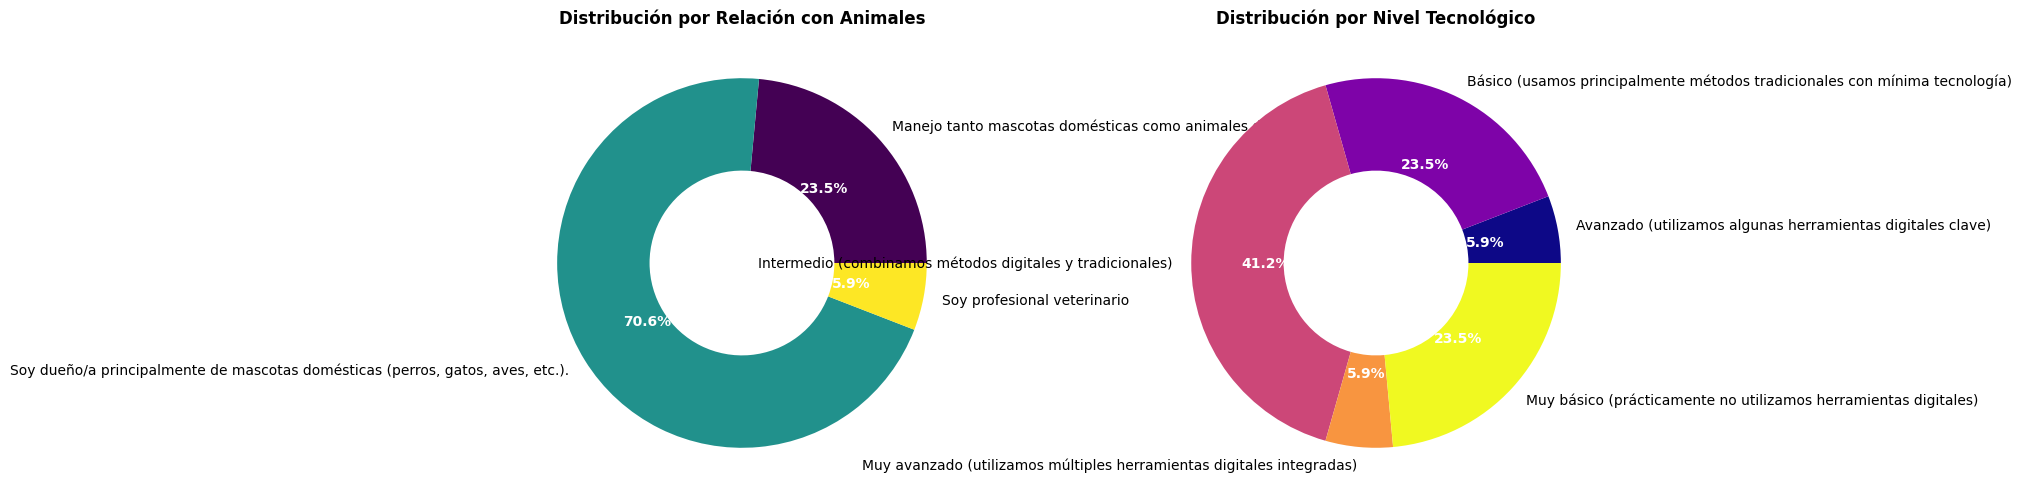

📊 Visualizaciones completadas:
1. Heatmap de la matriz de segmentación
2. Gráfico de barras agrupadas
3. Gráfico de barras apiladas
4. Scatter plot con tamaños proporcionales
5. Gráficos de dona para cada dimensión


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

plt.style.use('default')
sns.set_palette("viridis")

segmentacion_clean = segmentacion.iloc[:-1, :-1]

segmentacion_melted = segmentacion_clean.reset_index().melt(
    id_vars=['relacion_animales'], 
    var_name='nivel_tecnologico', 
    value_name='cantidad'
)

# 1. HEATMAP - Matriz de segmentación
plt.figure(figsize=(10, 6))
sns.heatmap(
    segmentacion_clean, 
    annot=True, 
    fmt='d', 
    cmap='viridis',
    cbar_kws={'label': 'Número de usuarios'},
    linewidths=0.5,
    linecolor='white'
)
plt.title('Matriz de Segmentación: Distribución de Usuarios', fontsize=14, fontweight='bold')
plt.xlabel('Nivel de Adopción Tecnológica', fontweight='bold')
plt.ylabel('Relación con Animales', fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. GRÁFICO DE BARRAS AGRUPADAS
fig, ax = plt.subplots(figsize=(12, 6))

x_pos = np.arange(len(segmentacion_clean.index))
width = 0.15
colors = plt.cm.viridis(np.linspace(0, 1, len(segmentacion_clean.columns)))

for i, col in enumerate(segmentacion_clean.columns):
    ax.bar(x_pos + i*width, segmentacion_clean[col], width, 
           label=col, color=colors[i], alpha=0.8)
    
    for j, v in enumerate(segmentacion_clean[col]):
        ax.text(x_pos[j] + i*width, v + 0.5, str(v), 
                ha='center', va='bottom', fontsize=9)

ax.set_xlabel('Relación con Animales', fontweight='bold')
ax.set_ylabel('Número de Usuarios', fontweight='bold')
ax.set_title('Distribución de Usuarios por Segmento', fontsize=14, fontweight='bold')
ax.set_xticks(x_pos + width * (len(segmentacion_clean.columns)-1)/2)
ax.set_xticklabels(segmentacion_clean.index, rotation=45)
ax.legend(title='Nivel Tecnológico', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 3. GRÁFICO DE BARRAS APILADAS
fig, ax = plt.subplots(figsize=(10, 6))

bottom = np.zeros(len(segmentacion_clean.index))
colors = plt.cm.viridis(np.linspace(0, 1, len(segmentacion_clean.columns)))

for i, col in enumerate(segmentacion_clean.columns):
    values = segmentacion_clean[col]
    ax.bar(segmentacion_clean.index, values, bottom=bottom, 
           label=col, color=colors[i], alpha=0.8)
    
    for j, v in enumerate(values):
        if v > 0:  # Solo mostrar si hay valor
            ax.text(j, bottom[j] + v/2, str(v), 
                    ha='center', va='center', fontweight='bold', fontsize=9)
    
    bottom += values

ax.set_xlabel('Relación con Animales', fontweight='bold')
ax.set_ylabel('Número de Usuarios', fontweight='bold')
ax.set_title('Distribución Acumulada por Segmento', fontsize=14, fontweight='bold')
ax.legend(title='Nivel Tecnológico', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. SCATTER PLOT con tamaños proporcionales
fig, ax = plt.subplots(figsize=(10, 8))

x_coords = []
y_coords = []
sizes = []
colors_list = []

for i, relacion in enumerate(segmentacion_clean.index):
    for j, tecnologia in enumerate(segmentacion_clean.columns):
        valor = segmentacion_clean.iloc[i, j]
        if valor > 0:
            x_coords.append(j)
            y_coords.append(i)
            sizes.append(valor * 50)  # Escalar el tamaño
            colors_list.append(valor)

scatter = ax.scatter(x_coords, y_coords, s=sizes, c=colors_list, 
                    cmap='viridis', alpha=0.7, edgecolors='black', linewidth=1)

ax.set_xticks(range(len(segmentacion_clean.columns)))
ax.set_xticklabels(segmentacion_clean.columns, rotation=45)
ax.set_yticks(range(len(segmentacion_clean.index)))
ax.set_yticklabels(segmentacion_clean.index)

ax.set_xlabel('Nivel de Adopción Tecnológica', fontweight='bold')
ax.set_ylabel('Relación con Animales', fontweight='bold')
ax.set_title('Matriz de Segmentación: Tamaño Proporcional', fontsize=14, fontweight='bold')

cbar = plt.colorbar(scatter)
cbar.set_label('Número de Usuarios', fontweight='bold')

for i, (x, y, val) in enumerate(zip(x_coords, y_coords, colors_list)):
    ax.text(x, y, str(int(val)), ha='center', va='center', 
            fontweight='bold', fontsize=10, color='white')

plt.tight_layout()
plt.show()

# 5. GRÁFICO DE DONA (PIE CHART) por categoría principal
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

relacion_totales = segmentacion_clean.sum(axis=1)
colors1 = plt.cm.viridis(np.linspace(0, 1, len(relacion_totales)))

wedges1, texts1, autotexts1 = ax1.pie(relacion_totales, labels=relacion_totales.index, 
                                      autopct='%1.1f%%', colors=colors1,
                                      wedgeprops=dict(width=0.5))
ax1.set_title('Distribución por Relación con Animales', fontweight='bold')

tecnologia_totales = segmentacion_clean.sum(axis=0)
colors2 = plt.cm.plasma(np.linspace(0, 1, len(tecnologia_totales)))

wedges2, texts2, autotexts2 = ax2.pie(tecnologia_totales, labels=tecnologia_totales.index,
                                      autopct='%1.1f%%', colors=colors2,
                                      wedgeprops=dict(width=0.5))
ax2.set_title('Distribución por Nivel Tecnológico', fontweight='bold')

for autotext in autotexts1 + autotexts2:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.tight_layout()
plt.show()

In [173]:
print("=== ANÁLISIS DE SEGMENTOS PRIORITARIOS ===\n")

segmentos_detalle = []
for relacion in df['relacion_animales'].unique():
    for tecnologia in df['nivel_adopcion_tecnologica'].unique():
        subset = df[(df['relacion_animales'] == relacion) & (df['nivel_adopcion_tecnologica'] == tecnologia)]
        if len(subset) > 0:
            importancia_movil_promedio = subset['importancia_dispositivos_moviles_num'].mean()
            
            segmentos_detalle.append({
                'relacion_animales': relacion,
                'nivel_tecnologico': tecnologia,
                'cantidad_usuarios': len(subset),
                'porcentaje_total': (len(subset) / len(df)) * 100,
                'importancia_movil_promedio': importancia_movil_promedio,
                'importancia_movil_pct': (importancia_movil_promedio / 4) * 100
            })

segmentos_df = pd.DataFrame(segmentos_detalle)
segmentos_df = segmentos_df.sort_values('cantidad_usuarios', ascending=False)

print("Segmentos ordenados por tamaño:")
print(segmentos_df.round(2))

print("\n=== TOP 3 SEGMENTOS PRIORITARIOS ===\n")
for i, (idx, segmento) in enumerate(segmentos_df.head(3).iterrows()):
    print(f"{i+1}. {segmento['relacion_animales']} + {segmento['nivel_tecnologico']}")
    print(f"   - Usuarios: {segmento['cantidad_usuarios']} ({segmento['porcentaje_total']:.1f}% del total)")
    print(f"   - Importancia dispositivos móviles: {segmento['importancia_movil_pct']:.1f}%")
    print()

=== ANÁLISIS DE SEGMENTOS PRIORITARIOS ===

Segmentos ordenados por tamaño:
                                   relacion_animales  \
0  Soy dueño/a principalmente de mascotas domésti...   
2  Soy dueño/a principalmente de mascotas domésti...   
3  Soy dueño/a principalmente de mascotas domésti...   
1  Soy dueño/a principalmente de mascotas domésti...   
4  Manejo tanto mascotas domésticas como animales...   
5  Manejo tanto mascotas domésticas como animales...   
6  Manejo tanto mascotas domésticas como animales...   
7  Manejo tanto mascotas domésticas como animales...   
8                        Soy profesional veterinario   

                                   nivel_tecnologico  cantidad_usuarios  \
0  Intermedio (combinamos métodos digitales y tra...                  6   
2  Básico (usamos principalmente métodos tradicio...                  3   
3  Muy básico (prácticamente no utilizamos herram...                  2   
1  Avanzado (utilizamos algunas herramientas digi...           

## 6. Priorización Funcional (Objetivo Específico 2)

### 6.1 Análisis de funcionalidades más valoradas

Analizamos las funcionalidades que los usuarios consideran más valiosas para jerarquizar el desarrollo del MVP. Procesamos las respuestas de opción múltiple para identificar las prioridades.

In [174]:
funcionalidades_mapping = {
    "Expediente clínico/de salud digital por animal, completo y accesible 24/7.": "FUNC_001",
    "Sistema de agenda y gestión de citas (para solicitar o administrar).": "FUNC_002", 
    "Gestión de inventario (medicamentos, insumos, alimentos, etc.).": "FUNC_003",
    "Módulo de facturación, gestión financiera o historial de pagos.": "FUNC_004",
    "Canales de comunicación directa (chat, notificaciones) entre las partes involucradas (dueños, productores, veterinarios).": "FUNC_005",
    "Recordatorios automáticos (vacunas, tratamientos, citas, seguimientos, etc.).": "FUNC_006",
    "Acceso y/o gestión de imágenes diagnósticas (radiografías, ecografías, etc.).": "FUNC_007",
    "Prescripción digital de medicamentos (generar o recibir).": "FUNC_008",
    "Herramientas de apoyo basadas en inteligencia artificial (para diagnóstico, información, alertas).": "FUNC_009",
    "Acceso a consejos de salud, bienestar personalizados o información técnica actualizada.": "FUNC_010",
    "Facilidad para compartir información de forma segura con otros usuarios o profesionales (con los permisos adecuados).": "FUNC_011",
    "Posibilidad de uso sin conexión a internet (funcionalidad offline).": "FUNC_012",
    "herramientas de apoyo basadas de acuerdo a especie animal": "FUNC_013"
}

print("=== DICCIONARIO DE FUNCIONALIDADES A COMPLETAR ===")
print("- Key: Texto exacto de cada opción de funcionalidad")
print("- Value: Código único (ej: FUNC_001, FUNC_002, etc.)")
print("\nOpciones únicas encontradas en los datos:")
print("=" * 60)

respuestas_unicas = set()
for respuesta in df['funcionalidades_valiosas'].dropna():
    respuestas_unicas.add(str(respuesta))

for i, respuesta in enumerate(sorted(respuestas_unicas), 1):
    print(f"{i:2d}. {respuesta}")
    print()

print("=" * 60)

def procesar_respuestas_con_mapeo(serie_respuestas, mapping_dict):
    """
    Procesa respuestas múltiples usando un diccionario de mapeo
    para evitar problemas con comas en las opciones.
    """
    if not mapping_dict:
        print("ERROR: El diccionario de mapeo está vacío. Complétalo primero.")
        return [], {}, {}
    
    respuestas_codificadas = []
    
    for respuesta_original in serie_respuestas:
        respuesta_str = str(respuesta_original)
        respuesta_procesada = respuesta_str
        
        for opcion_texto, codigo in mapping_dict.items():
            if opcion_texto in respuesta_procesada:
                respuesta_procesada = respuesta_procesada.replace(opcion_texto, codigo)
        
        codigos = [codigo.strip() for codigo in respuesta_procesada.split(',')]
        respuestas_codificadas.extend(codigos)
    
    from collections import Counter
    conteo_codigos = Counter(respuestas_codificadas)
    
    mapeo_inverso = {v: k for k, v in mapping_dict.items()}
    
    return respuestas_codificadas, conteo_codigos, mapeo_inverso

=== DICCIONARIO DE FUNCIONALIDADES A COMPLETAR ===
- Key: Texto exacto de cada opción de funcionalidad
- Value: Código único (ej: FUNC_001, FUNC_002, etc.)

Opciones únicas encontradas en los datos:
 1. Canales de comunicación directa (chat, notificaciones) entre las partes involucradas (dueños, productores, veterinarios).

 2. Expediente clínico/de salud digital por animal, completo y accesible 24/7.

 3. Expediente clínico/de salud digital por animal, completo y accesible 24/7., Canales de comunicación directa (chat, notificaciones) entre las partes involucradas (dueños, productores, veterinarios).

 4. Expediente clínico/de salud digital por animal, completo y accesible 24/7., Canales de comunicación directa (chat, notificaciones) entre las partes involucradas (dueños, productores, veterinarios)., Recordatorios automáticos (vacunas, tratamientos, citas, seguimientos, etc.)., Acceso a consejos de salud, bienestar personalizados o información técnica actualizada.

 5. Expediente clíni

In [175]:
funcionalidades_series = df['funcionalidades_valiosas'].dropna()

if funcionalidades_mapping:
    print("Procesando con mapeo seguro...")
    respuestas_codificadas, conteo_codigos, mapeo_inverso = procesar_respuestas_con_mapeo(
        funcionalidades_series, funcionalidades_mapping
    )
    
    funcionalidades_df = pd.DataFrame([
        {
            'funcionalidad': mapeo_inverso.get(codigo, codigo),  # Usar texto original si existe
            'menciones': count, 
            'porcentaje': (count/len(df))*100
        }
        for codigo, count in conteo_codigos.most_common()
        if codigo in mapeo_inverso  # Solo incluir códigos válidos
    ])
    
else:
    print("Usando método básico (puede tener errores con comas)...")
    funcionalidades_individuales = []
    for respuesta in funcionalidades_series:
        funciones = [func.strip() for func in str(respuesta).split(',')]
        funcionalidades_individuales.extend(funciones)
    
    from collections import Counter
    conteo_funcionalidades = Counter(funcionalidades_individuales)
    
    funcionalidades_df = pd.DataFrame([
        {'funcionalidad': func, 'menciones': count, 'porcentaje': (count/len(df))*100}
        for func, count in conteo_funcionalidades.most_common()
    ])

print("=== RANKING DE FUNCIONALIDADES VALORADAS ===\n")
for i, row in funcionalidades_df.iterrows():
    print(f"{i+1:2d}. {row['funcionalidad'][:60]}{'...' if len(row['funcionalidad']) > 60 else ''}")
    print(f"     Menciones: {row['menciones']} ({row['porcentaje']:.1f}% de encuestados)")
    print()

Procesando con mapeo seguro...
=== RANKING DE FUNCIONALIDADES VALORADAS ===

 1. Expediente clínico/de salud digital por animal, completo y a...
     Menciones: 10 (58.8% de encuestados)

 2. Sistema de agenda y gestión de citas (para solicitar o admin...
     Menciones: 8 (47.1% de encuestados)

 3. Recordatorios automáticos (vacunas, tratamientos, citas, seg...
     Menciones: 7 (41.2% de encuestados)

 4. Acceso a consejos de salud, bienestar personalizados o infor...
     Menciones: 7 (41.2% de encuestados)

 5. Posibilidad de uso sin conexión a internet (funcionalidad of...
     Menciones: 7 (41.2% de encuestados)

 6. Facilidad para compartir información de forma segura con otr...
     Menciones: 6 (35.3% de encuestados)

 7. Herramientas de apoyo basadas en inteligencia artificial (pa...
     Menciones: 5 (29.4% de encuestados)

 8. Canales de comunicación directa (chat, notificaciones) entre...
     Menciones: 5 (29.4% de encuestados)

 9. Gestión de inventario (medicamentos, i

/tmp/ipykernel_98162/2489195567.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_98162/2489195567.py:12: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



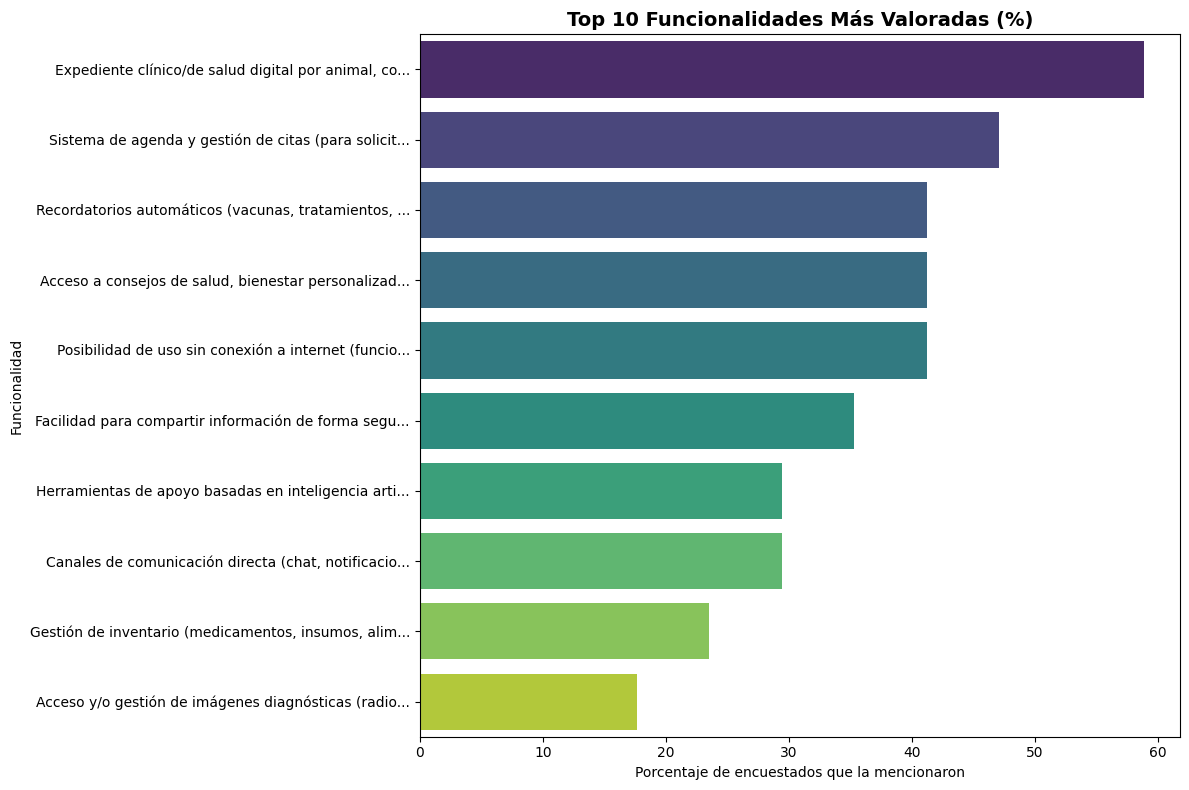


Total de funcionalidades únicas mencionadas: 13
Funcionalidades con >20% de menciones: 9


In [176]:
top_funcionalidades = funcionalidades_df.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(data=top_funcionalidades, y='funcionalidad', x='porcentaje', palette='viridis')
plt.title('Top 10 Funcionalidades Más Valoradas (%)', fontsize=14, fontweight='bold')
plt.xlabel('Porcentaje de encuestados que la mencionaron')
plt.ylabel('Funcionalidad')

ax = plt.gca()
labels = [label.get_text()[:50] + '...' if len(label.get_text()) > 50 else label.get_text() 
          for label in ax.get_yticklabels()]
ax.set_yticklabels(labels)

plt.tight_layout()
plt.show()

print(f"\nTotal de funcionalidades únicas mencionadas: {len(funcionalidades_df)}")
print(f"Funcionalidades con >20% de menciones: {len(funcionalidades_df[funcionalidades_df['porcentaje'] > 20])}")

In [177]:
def analizar_funcionalidades_por_segmento(df, columna_segmento, mapping_dict):
    """
    Analiza funcionalidades por segmento usando mapeo seguro
    """
    print(f"=== ANÁLISIS DE FUNCIONALIDADES POR {columna_segmento.upper()} ===\n")
    
    for segmento in df[columna_segmento].unique():
        print(f"\n--- {segmento} ---")
        subset = df[df[columna_segmento] == segmento]
        
        if mapping_dict:
            segmento_series = subset['funcionalidades_valiosas'].dropna()
            if len(segmento_series) > 0:
                _, conteo_codigos, mapeo_inverso = procesar_respuestas_con_mapeo(
                    segmento_series, mapping_dict
                )
                
                print(f"Total usuarios en segmento: {len(subset)}")
                print("Top 5 funcionalidades:")
                
                for i, (codigo, count) in enumerate(conteo_codigos.most_common(5)):
                    if codigo in mapeo_inverso:
                        func_texto = mapeo_inverso[codigo]
                        porcentaje = (count / len(subset)) * 100
                        print(f"  {i+1}. {func_texto[:45]}{'...' if len(func_texto) > 45 else ''} ({porcentaje:.1f}%)")
            else:
                print("  No hay datos de funcionalidades para este segmento")
        else:
            func_segmento = []
            for respuesta in subset['funcionalidades_valiosas'].dropna():
                funciones = [func.strip() for func in str(respuesta).split(',')]
                func_segmento.extend(funciones)
            
            conteo_segmento = Counter(func_segmento)
            print(f"Total usuarios en segmento: {len(subset)}")
            print("Top 5 funcionalidades:")
            
            for i, (func, count) in enumerate(conteo_segmento.most_common(5)):
                porcentaje = (count / len(subset)) * 100
                print(f"  {i+1}. {func[:45]}{'...' if len(func) > 45 else ''} ({porcentaje:.1f}%)")
        print()

analizar_funcionalidades_por_segmento(df, 'relacion_animales', funcionalidades_mapping)

=== ANÁLISIS DE FUNCIONALIDADES POR RELACION_ANIMALES ===


--- Soy dueño/a principalmente de mascotas domésticas (perros, gatos, aves, etc.). ---
Total usuarios en segmento: 12
Top 5 funcionalidades:
  1. Expediente clínico/de salud digital por anima... (41.7%)
  2. Sistema de agenda y gestión de citas (para so... (33.3%)
  3. Canales de comunicación directa (chat, notifi... (33.3%)
  4. Acceso a consejos de salud, bienestar persona... (33.3%)
  5. Posibilidad de uso sin conexión a internet (f... (33.3%)


--- Manejo tanto mascotas domésticas como animales de granja/rancho. ---
Total usuarios en segmento: 4
Top 5 funcionalidades:
  1. Expediente clínico/de salud digital por anima... (100.0%)
  2. Sistema de agenda y gestión de citas (para so... (75.0%)
  3. Recordatorios automáticos (vacunas, tratamien... (75.0%)
  4. Facilidad para compartir información de forma... (75.0%)
  5. Herramientas de apoyo basadas en inteligencia... (50.0%)


--- Soy profesional veterinario ---
Total usuari

In [178]:
print("=== ANÁLISIS DE FUNCIONALIDADES POR SEGMENTO ===\n")

for relacion in df['relacion_animales'].unique():
    print(f"\n--- {relacion} ---")
    subset = df[df['relacion_animales'] == relacion]
    
    func_segmento = []
    for respuesta in subset['funcionalidades_valiosas'].dropna():
        funciones = [func.strip() for func in str(respuesta).split(',')]
        func_segmento.extend(funciones)
    
    conteo_segmento = Counter(func_segmento)
    print(f"Total usuarios en segmento: {len(subset)}")
    print("Top 5 funcionalidades:")
    
    for i, (func, count) in enumerate(conteo_segmento.most_common(5)):
        porcentaje = (count / len(subset)) * 100
        print(f"  {i+1}. {func[:45]}{'...' if len(func) > 45 else ''} ({porcentaje:.1f}%)")
    print()

=== ANÁLISIS DE FUNCIONALIDADES POR SEGMENTO ===


--- Soy dueño/a principalmente de mascotas domésticas (perros, gatos, aves, etc.). ---
Total usuarios en segmento: 12
Top 5 funcionalidades:
  1. etc.). (50.0%)
  2. Expediente clínico/de salud digital por anima... (41.7%)
  3. completo y accesible 24/7. (41.7%)
  4. Sistema de agenda y gestión de citas (para so... (33.3%)
  5. Canales de comunicación directa (chat (33.3%)


--- Manejo tanto mascotas domésticas como animales de granja/rancho. ---
Total usuarios en segmento: 4
Top 5 funcionalidades:
  1. etc.). (125.0%)
  2. Expediente clínico/de salud digital por anima... (100.0%)
  3. completo y accesible 24/7. (100.0%)
  4. Sistema de agenda y gestión de citas (para so... (75.0%)
  5. Recordatorios automáticos (vacunas (75.0%)


--- Soy profesional veterinario ---
Total usuarios en segmento: 1
Top 5 funcionalidades:
  1. etc.). (300.0%)
  2. Expediente clínico/de salud digital por anima... (100.0%)
  3. completo y accesible 24/7. (10

### 6.2 Definición del MVP y Roadmap

Basado en el análisis de funcionalidades y segmentos, definimos las prioridades para el desarrollo del MVP.

In [179]:
print("=== MVP Y ROADMAP ===\n")

if 'funcionalidades_df' in locals() and len(funcionalidades_df) > 0:
    func_mvp = funcionalidades_df[funcionalidades_df['porcentaje'] > 30]
    print("FUNCIONALIDADES CORE PARA MVP (>30% de usuarios):")
    if len(func_mvp) > 0:
        for i, row in func_mvp.iterrows():
            print(f"✓ {row['funcionalidad']} ({row['porcentaje']:.1f}%)")
    else:
        print("  No hay funcionalidades con >30% de menciones")

    print("\n" + "="*50)

    func_v2 = funcionalidades_df[(funcionalidades_df['porcentaje'] >= 15) & (funcionalidades_df['porcentaje'] <= 30)]
    print("\nFUNCIONALIDADES PARA V2.0 (15-30% de usuarios):")
    if len(func_v2) > 0:
        for i, row in func_v2.iterrows():
            print(f"○ {row['funcionalidad']} ({row['porcentaje']:.1f}%)")
    else:
        print("  No hay funcionalidades en este rango")

    print("\n" + "="*50)

    print("\nSEGMENTOS PRIORITARIOS PARA FOCALIZACIÓN INICIAL:")
    for i, (idx, segmento) in enumerate(segmentos_df.head(3).iterrows()):
        print(f"{i+1}. {segmento['relacion_animales']} con {segmento['nivel_tecnologico']}")
        print(f"   → {segmento['cantidad_usuarios']} usuarios ({segmento['porcentaje_total']:.1f}% del mercado)")
        print(f"   → Interés en móviles: {segmento['importancia_movil_pct']:.1f}%")

    print("\n" + "="*50)
    print("\nCONCLUSIONES CLAVE:")
    print(f"• Total de funcionalidades identificadas: {len(funcionalidades_df)}")
    print(f"• Funcionalidades core para MVP: {len(func_mvp)}")
    print(f"• Segmentos prioritarios identificados: 3")
    print(f"• Cobertura de segmentos top 3: {segmentos_df.head(3)['porcentaje_total'].sum():.1f}% del mercado")
    
    if funcionalidades_mapping:
        print(f"• Procesamiento: Mapeo seguro aplicado ✓")
    else:
        print(f"• Procesamiento: Método básico (completar mapeo recomendado)")
        
else:
    print("ERROR: No se han procesado las funcionalidades aún.")
    print("Ejecuta primero las celdas anteriores.")

=== MVP Y ROADMAP ===

FUNCIONALIDADES CORE PARA MVP (>30% de usuarios):
✓ Expediente clínico/de salud digital por animal, completo y accesible 24/7. (58.8%)
✓ Sistema de agenda y gestión de citas (para solicitar o administrar). (47.1%)
✓ Recordatorios automáticos (vacunas, tratamientos, citas, seguimientos, etc.). (41.2%)
✓ Acceso a consejos de salud, bienestar personalizados o información técnica actualizada. (41.2%)
✓ Posibilidad de uso sin conexión a internet (funcionalidad offline). (41.2%)
✓ Facilidad para compartir información de forma segura con otros usuarios o profesionales (con los permisos adecuados). (35.3%)


FUNCIONALIDADES PARA V2.0 (15-30% de usuarios):
○ Herramientas de apoyo basadas en inteligencia artificial (para diagnóstico, información, alertas). (29.4%)
○ Canales de comunicación directa (chat, notificaciones) entre las partes involucradas (dueños, productores, veterinarios). (29.4%)
○ Gestión de inventario (medicamentos, insumos, alimentos, etc.). (23.5%)
○ Acce